In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = pd.read_csv("~/Desktop/mcc20192/mlearning/tareas/tarea3/data/x_entrenamiento.csv", header=None)
y_train = pd.read_csv("~/Desktop/mcc20192/mlearning/tareas/tarea3/data/y_entrenamiento.csv", header=None)
x_val = pd.read_csv("~/Desktop/mcc20192/mlearning/tareas/tarea3/data/x_validacion.csv", header=None)
y_val = pd.read_csv("~/Desktop/mcc20192/mlearning/tareas/tarea3/data/y_validacion.csv", header=None)

## a. Graficación de los datos


Text(0.5, 1.0, 'Validation data')

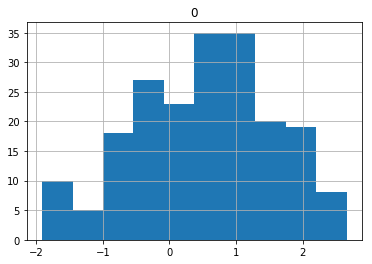

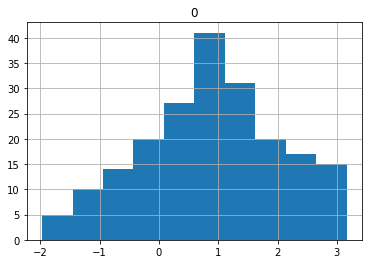

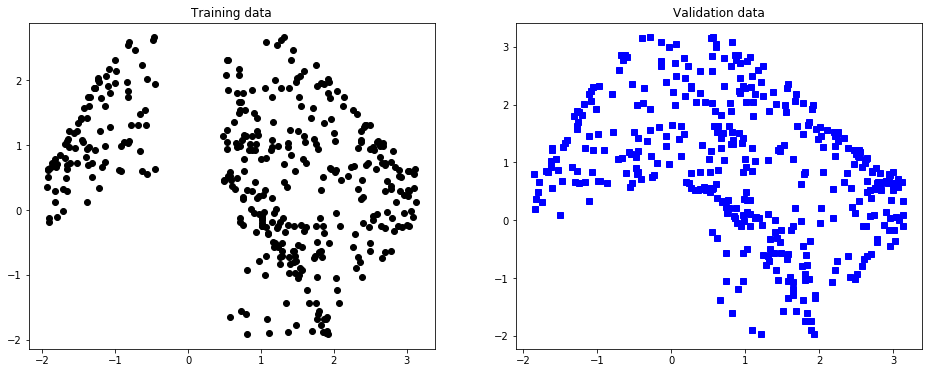

In [3]:
#x_train.hist()
y_train.hist()
#x_val.hist()
y_val.hist()
# Graficación de los datos
gs = plt.GridSpec(1,2)
fig = plt.figure(figsize=(16,6))
s1 = fig.add_subplot(gs[0,0])
s1.plot(x_train,y_train, 'ko')
plt.title("Training data")
s2 = fig.add_subplot(gs[0,1])
s2.plot(x_val,y_val,'bs')
plt.title("Validation data")

## b. Regresión lineal 
Modelo $f(x,a) = a_0+a_1x_1+a_2x_2$. Hallar $a = (a_0,a_1,a_2)$ que minimiza la función de error
$$E(a)=\frac{1}{2}\sum _{i=0}^N(y_i-f(x^i,a))^2$$

In [4]:
# Convert data to matrix form
X = x_train.values

# Response variable vector
y = y_train.values

# Calculate transpose of X
XT = np.transpose(X)

# Inverse of (X^TX)
I = np.linalg.inv(np.dot(XT,X))

# Least squares estimated parameters
altsq = np.dot(np.dot(I,XT),y)

x1_mean = np.mean(X[0:][0])
x2_mean = np.mean(X[0:][1])
y_mean = np.mean(y)
a_0 = y_mean - altsq[0][0]*x1_mean - altsq[1][0]*x2_mean

# Print estimated parameters
print("a_0 = ", a_0)
print("a_1 = ", altsq[0][0])
print("a_2 = ", altsq[1][0])

a_0 =  0.10852455040305642
a_1 =  -0.5157292030875676
a_2 =  0.1957686442687782


In [5]:
# Predictions
def predict(x):
    return  altsq[0][0]*x[0] + altsq[1][0]*x[1] + a_0

# Función suma de errores cuadrados
def sqerrors(x,y):
    s = 0.0
    for i in range(0,len(x)):
        s += (predict(x[i])-y[i][0])**2
    return np.sqrt(s/2)

print("Error on training set:", sqerrors(X,y))
print("Error on test set:", sqerrors(x_val.values,y_val.values))

Error on training set: 8.461368098628634
Error on test set: 11.028693253836355


In [6]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()
linreg.fit(x_train,y_train)
#print(linreg.coef_)
#linreg.score(x_val,y_val)
#linreg.predict(X)[0]

# Función suma de errores cuadrados
def skl_sqerrors(x,y):
    s = 0.0
    xl = linreg.predict(x)
    for i in range(0,len(x)):
        s += (xl[i]-y[i][0])**2
    return np.sqrt(s/2)

print("Error on training set with linreg:", skl_sqerrors(X,y))
print("Error on test set with linreg:", skl_sqerrors(x_val.values,y_val.values))

Error on training set with linreg: [7.67886521]
Error on test set with linreg: [9.48014098]


In [7]:
from polynomialReg import *
polreg = polynomial_linreg()
polreg.fit(X,y,1)


TypeError: fit() takes 3 positional arguments but 4 were given